## Mahyar Mohammadi Matin - 610398166

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,0.0
4,-1.540663,-0.048947,0.0


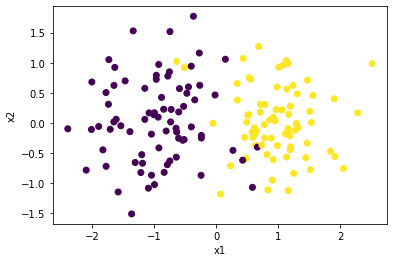

In [55]:
plt.scatter(train.x1,train.x2,c=train.target)
plt.xlabel('x1')
plt.ylabel('x2')
pass

#### As they are not linearly sepratable, so algorithm is not going to converge. we apply some iteration for it

In [95]:
X_train = train[['x1','x2']]
y_train = train['target'].apply(lambda x: -1 if x==0 else x)
X_test = test[['x1','x2']]
y_test = test['target'].apply(lambda x: -1 if x==0 else x)
y_train

0      1.0
1      1.0
2      1.0
3     -1.0
4     -1.0
      ... 
145    1.0
146   -1.0
147   -1.0
148   -1.0
149   -1.0
Name: target, Length: 150, dtype: float64

In [142]:
class Perceptron:
    def __init__(self, iteration=100, alpha=0.01):
        self.iteration = iteration
        self.alpha = alpha

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.X = X
        self.y = y
        self.best_accuracy = 0
        i,accuracy=0,0
        while accuracy<1 and i<self.iteration:
            accuracy = 0
            for x,label in zip(X,y):
                if label * self.predict(x) <= 0:
                    self.weights += self.alpha * label * x
                    self.bias += self.alpha * label
                else:
                    accuracy += 1
            accuracy = accuracy / len(X)
            if accuracy > self.best_accuracy:
                self.best_weights = self.weights.copy()
                self.best_bias = self.bias
                self.best_accuracy = accuracy
            i+=1
        self.weights = self.best_weights
        self.bias = self.best_bias

    def predict(self, x):
        return np.sign(x@self.weights + self.bias)
    
    def test_accuracy(self,X=None,y=None):
        if X is None:
            X = self.X
            y = self.y
        return f'{round(sum(model.predict(X)*y)*100/len(X),1)}%'
    
    def draw(self,x):
        if len(self.weights)==2:
            y = (self.weights[0]*x+self.bias)/self.weights[1]
            plt.plot(x,y)
        else:
            print("can't draw 3D shapes!")



weights: [ 0.02244959 -0.00471331] ,Bias: 0.0
train accuracy: 90.7%


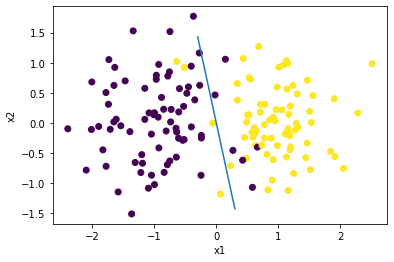

In [143]:
model = Perceptron()
model.fit(X_train.to_numpy(),y_train)
print(f'weights:',model.weights,',Bias:',model.bias)
print('train accuracy:',model.test_accuracy())
model.draw(np.array([-0.3,0.3]))
plt.scatter(train.x1,train.x2,c=train.target)
plt.xlabel('x1')
plt.ylabel('x2')
pass

test accuracy: 96.0%


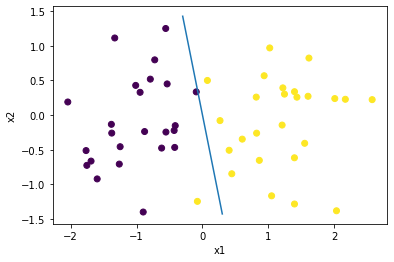

In [144]:
print('test accuracy:',model.test_accuracy(X_test,y_test))
model.draw(np.array([-0.3,0.3]))
plt.scatter(test.x1,test.x2,c=test.target)
plt.xlabel('x1')
plt.ylabel('x2')
pass